In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('Ex-01').sheet1
data = worksheet.get_all_values()

In [ ]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'Input':'float'})
dataset1 = dataset1.astype({'Output':'float'})
dataset1.head()

,Input,Output
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


from matplotlib import pyplot as plt
_df_0['Input'].plot(kind='hist', bins=20, title='Input')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Output'].plot(kind='hist', bins=20, title='Output')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Input', y='Output', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Input']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Input'}, axis=1)
              .sort_values('Input', ascending=True))
  xs = counted['Input']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Input', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Input')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Output']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Output'}, axis=1)
              .sort_values('Output', ascending=True))
  xs = counted['Output']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Output', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Output')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['Input'].plot(kind='line', figsize=(8, 4), title='Input')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Output'].plot(kind='line', figsize=(8, 4), title='Output')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
X = dataset1[['Input']].values

In [ ]:
y = dataset1[['Output']].values

In [ ]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [25.],
       [26.],
       [27.],
       [28.],
       [29.]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)

In [ ]:
ai_brain = Sequential()
ai_brain.add(Dense(15,activation='relu'))
ai_brain.add(Dense(10,activation='relu'))
ai_brain.add(Dense(1))

In [ ]:
ai_brain.compile(optimizer = 'rmsprop', loss = 'mse')


In [ ]:
ai_brain.fit(X_train1,y_train,epochs = 2000)

Epoch 1/2000
1/1 [==============================] - 1s 781ms/step - loss: 29954.7598
Epoch 2/2000
1/1 [==============================] - 0s 10ms/step - loss: 29949.7207
Epoch 3/2000
1/1 [==============================] - 0s 10ms/step - loss: 29946.0332
Epoch 4/2000
1/1 [==============================] - 0s 10ms/step - loss: 29942.9004
Epoch 5/2000
1/1 [==============================] - 0s 9ms/step - loss: 29940.1445
Epoch 6/2000
1/1 [==============================] - 0s 12ms/step - loss: 29937.5957
Epoch 7/2000
1/1 [==============================] - 0s 11ms/step - loss: 29935.1309
Epoch 8/2000
1/1 [==============================] - 0s 10ms/step - loss: 29932.6055
Epoch 9/2000
1/1 [==============================] - 0s 12ms/step - loss: 29929.9375
Epoch 10/2000
1/1 [==============================] - 0s 9ms/step - loss: 29927.3320
Epoch 11/2000
1/1 [==============================] - 0s 10ms/step - loss: 29924.6973
Epoch 12/2000
1/1 [==============================] - 0s 10ms/step - loss: 2

In [ ]:
loss_df = pd.DataFrame(ai_brain.history.history)


<Axes: >

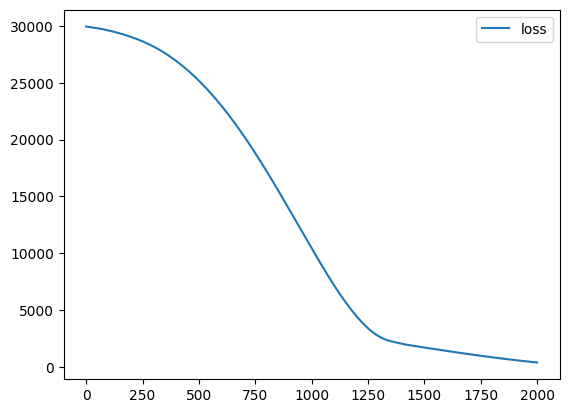

In [ ]:
loss_df.plot()


In [ ]:
X_test1 = Scaler.transform(X_test)


In [ ]:
ai_brain.evaluate(X_test1,y_test)


1/1 [==============================] - 0s 87ms/step - loss: 502.4049


502.4048767089844

In [ ]:
X_n1 = [[30]]


In [ ]:
X_n1_1 = Scaler.transform(X_n1)


In [ ]:
ai_brain.predict(X_n1_1)

1/1 [==============================] - 0s 74ms/step


array([[274.3016]], dtype=float32)